In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
#와인 샘플 데이터 로드
wine = load_wine()

X = wine.data
y = wine.target

In [3]:
#의사 결정 분류기
tree1 = DecisionTreeClassifier(min_samples_leaf=3, random_state=0).fit(X, y)

In [4]:
from sklearn.metrics import accuracy_score

y_pred_tr1 = tree1.predict(X)
print("정확도: %.2f" %(accuracy_score(y, y_pred_tr1)*100), "%")

정확도: 96.07 %


In [5]:
from sklearn.tree import export_graphviz
import pydot

def draw_decision_tree(model, filename):
    export_graphviz(model, out_file=filename+".dot",
                    feature_names=wine.feature_names, impurity=False, filled=True)
    (graph,) = pydot.graph_from_dot_file(filename+".dot", encoding='utf8')
    graph.write_png(filename+".png")

In [6]:
draw_decision_tree(tree1, "Wine_tree1")

In [7]:
tree2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=0).fit(X, y)

In [8]:
y_pred_tr2 = tree2.predict(X)
print("정확도: %.2f" %(accuracy_score(y, y_pred_tr2)*100), "%")

정확도: 95.51 %


In [9]:
draw_decision_tree(tree2, "Wine_tree2")

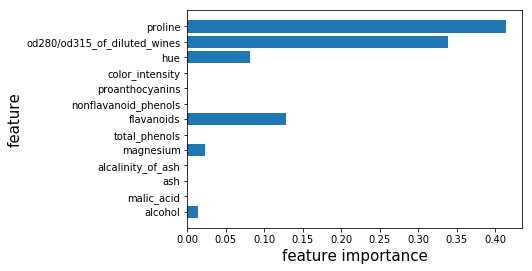

In [11]:
import matplotlib.pylab as plt
import numpy as np

idx = np.arange(X.shape[1])
plt.barh(idx, tree1.feature_importances_, align='center')
plt.yticks(idx, wine.feature_names)
plt.ylabel('feature', size=15)
plt.xlabel('feature importance', size=15)
plt.show()

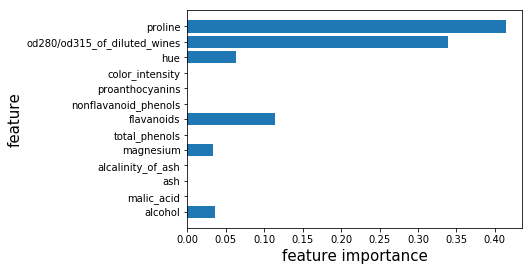

In [12]:
import matplotlib.pylab as plt
import numpy as np

idx = np.arange(X.shape[1])
plt.barh(idx, tree2.feature_importances_, align='center')
plt.yticks(idx, wine.feature_names)
plt.ylabel('feature', size=15)
plt.xlabel('feature importance', size=15)
plt.show()